In [106]:
# import kagglehub
# ''' 
# Extracting model files...
# Path to dataset files:
# path  C:\Users\Bagas\.cache\kagglehub\datasets\noahjanes\canadian-cheese-directory\versions\1

# '''
# # Download latest version
# path = kagglehub.dataset_download("noahjanes/canadian-cheese-directory")

# print("Path to dataset files:", path)

In [107]:
import os
import pandas as pd
# Define the directory path
directory_path = r"C:\Users\Bagas\.cache\kagglehub\datasets\noahjanes\canadian-cheese-directory\versions\1"

# Change the current working directory
os.chdir(directory_path)

# Verify the change
print("Current Directory:", os.getcwd())
df = pd.read_csv("cheese_data.csv")
df.head()

Current Directory: C:\Users\Bagas\.cache\kagglehub\datasets\noahjanes\canadian-cheese-directory\versions\1


,CheeseId,ManufacturerProvCode,ManufacturingTypeEn,MoisturePercent,FlavourEn,CharacteristicsEn,Organic,CategoryTypeEn,MilkTypeEn,MilkTreatmentTypeEn,RindTypeEn,CheeseName,FatLevel
0,228,NB,Farmstead,47.0,"Sharp, lactic",Uncooked,0,Firm Cheese,Ewe,Raw Milk,Washed Rind,Sieur de Duplessis (Le),lower fat
1,242,NB,Farmstead,47.9,"Sharp, lactic, lightly caramelized",Uncooked,0,Semi-soft Cheese,Cow,Raw Milk,Washed Rind,Tomme Le Champ Doré,lower fat
2,301,ON,Industrial,54.0,"Mild, tangy, and fruity","Pressed and cooked cheese, pasta filata, inter...",0,Firm Cheese,Cow,Pasteurized,NaN,Provolone Sette Fette (Tre-Stelle),lower fat
3,303,NB,Farmstead,47.0,Sharp with fruity notes and a hint of wild honey,NaN,0,Veined Cheeses,Cow,Raw Milk,NaN,Geai Bleu (Le),lower fat
4,319,NB,Farmstead,49.4,Softer taste,NaN,1,Semi-soft Cheese,Cow,Raw Milk,Washed Rind,Gamin (Le),lower fat


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CheeseId              1042 non-null   int64  
 1   ManufacturerProvCode  1042 non-null   object 
 2   ManufacturingTypeEn   1042 non-null   object 
 3   MoisturePercent       1028 non-null   float64
 4   FlavourEn             801 non-null    object 
 5   CharacteristicsEn     643 non-null    object 
 6   Organic               1042 non-null   int64  
 7   CategoryTypeEn        1019 non-null   object 
 8   MilkTypeEn            1041 non-null   object 
 9   MilkTreatmentTypeEn   977 non-null    object 
 10  RindTypeEn            721 non-null    object 
 11  CheeseName            1042 non-null   object 
 12  FatLevel              1042 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 106.0+ KB


CheeseId: Unique identifier for each cheese1
.

ManufacturerProvCode: Code representing the province of the manufacturer1
.

ManufacturingTypeEn: Description of the manufacturing process in English1
.

MoisturePercent: Percentage of moisture content in the cheese1
.

FlavourEn: Flavor profile of the cheese in English1
.

CharacteristicsEn: Additional characteristics of the cheese in English1
.

Organic: Indicates if the cheese is organic (1 for yes, 0 for no)1
.

CategoryTypeEn: Category type of the cheese in English1
.

MilkTypeEn: Type of milk used (cow, goat, sheep, buffalo) in English1
.

MilkTreatmentTypeEn: Description of how the milk was treated in English1
.

RindTypeEn: Type of rind on the cheese in English1
.

CheeseName: Name of the cheese1
.

FatLevel: Fat content level of the cheese1
.

In [109]:
drop_col = ["CheeseId", "ManufacturerProvCode", "ManufacturingTypeEn", "FlavourEn", "CharacteristicsEn"]
df.drop(columns=drop_col, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MoisturePercent      1028 non-null   float64
 1   Organic              1042 non-null   int64  
 2   CategoryTypeEn       1019 non-null   object 
 3   MilkTypeEn           1041 non-null   object 
 4   MilkTreatmentTypeEn  977 non-null    object 
 5   RindTypeEn           721 non-null    object 
 6   CheeseName           1042 non-null   object 
 7   FatLevel             1042 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 65.3+ KB


In [110]:
print(df.isnull().sum())

MoisturePercent         14
Organic                  0
CategoryTypeEn          23
MilkTypeEn               1
MilkTreatmentTypeEn     65
RindTypeEn             321
CheeseName               0
FatLevel                 0
dtype: int64


In [111]:
# mengisi nilai Nan dgn rata2

df["MoisturePercent"] = df["MoisturePercent"].fillna(df["MoisturePercent"].mean())
df["MoisturePercent"]

0       47.0
1       47.9
2       54.0
3       47.0
4       49.4
        ... 
1037    37.0
1038    46.0
1039    40.0
1040    34.0
1041    31.5
Name: MoisturePercent, Length: 1042, dtype: float64

In [112]:
# mengubah CategoryTypeEn menjadi numerik
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# mengganti nilai nan dengan nilai yg sering muncul
imputer = SimpleImputer(strategy="most_frequent")
df["CategoryTypeEn"] = imputer.fit_transform(df[["CategoryTypeEn"]]).ravel()

df["CategoryTypeEn"] = df["CategoryTypeEn"].str.lower().str.strip()

label_encoder = LabelEncoder()
df["CategoryTypeEn"] = label_encoder.fit_transform(df["CategoryTypeEn"])

value_count = df["CategoryTypeEn"].astype(str).value_counts(dropna=False)
value_count

CategoryTypeEn
0    372
4    267
3    227
1    119
2     32
5     25
Name: count, dtype: int64

In [113]:
print(df.isnull().sum())

MoisturePercent          0
Organic                  0
CategoryTypeEn           0
MilkTypeEn               1
MilkTreatmentTypeEn     65
RindTypeEn             321
CheeseName               0
FatLevel                 0
dtype: int64


In [114]:
df.dtypes

MoisturePercent        float64
Organic                  int64
CategoryTypeEn           int32
MilkTypeEn              object
MilkTreatmentTypeEn     object
RindTypeEn              object
CheeseName              object
FatLevel                object
dtype: object

In [115]:
imputer = SimpleImputer(strategy="most_frequent")
df['FatLevel'] = imputer.fit_transform(df[['FatLevel']]).ravel()

df["FatLevel"] = df["FatLevel"].str.lower().str.strip()

from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(categories='auto')

df["FatLevel"] = encoder.fit_transform(df[["FatLevel"]])
df.dtypes

MoisturePercent        float64
Organic                  int64
CategoryTypeEn           int32
MilkTypeEn              object
MilkTreatmentTypeEn     object
RindTypeEn              object
CheeseName              object
FatLevel               float64
dtype: object

In [116]:
df.head(10)

,MoisturePercent,Organic,CategoryTypeEn,MilkTypeEn,MilkTreatmentTypeEn,RindTypeEn,CheeseName,FatLevel
0,47.0,0,0,Ewe,Raw Milk,Washed Rind,Sieur de Duplessis (Le),1.0
1,47.9,0,3,Cow,Raw Milk,Washed Rind,Tomme Le Champ Doré,1.0
2,54.0,0,0,Cow,Pasteurized,NaN,Provolone Sette Fette (Tre-Stelle),1.0
3,47.0,0,5,Cow,Raw Milk,NaN,Geai Bleu (Le),1.0
4,49.4,1,3,Cow,Raw Milk,Washed Rind,Gamin (Le),1.0
5,48.0,0,1,Cow,Pasteurized,NaN,Paneer (Northumberland Co-operative),1.0
6,52.0,0,4,Goat,Pasteurized,Bloomy Rind,Goat Brie (Woolwich),1.0
7,41.0,0,0,Goat,Pasteurized,NaN,Goat Cheddar (Woolwich),1.0
8,50.0,0,3,Goat,Pasteurized,NaN,Goat Mozarella (Woolwich),1.0
9,55.0,0,4,Goat,Pasteurized,NaN,Goat Feta (Woolwich),1.0


In [117]:
print(df.isnull().sum())

MoisturePercent          0
Organic                  0
CategoryTypeEn           0
MilkTypeEn               1
MilkTreatmentTypeEn     65
RindTypeEn             321
CheeseName               0
FatLevel                 0
dtype: int64


In [118]:

imputer = SimpleImputer(strategy="most_frequent")
df["RindTypeEn"] = imputer.fit_transform(df[['RindTypeEn']]).ravel()
print("unique: ", df["RindTypeEn"].unique())

df["RindTypeEn"].str.lower().str.strip()
df["RindTypeEn"] = label_encoder.fit_transform(df["RindTypeEn"])

df = df.dropna()
df.dtypes

unique:  ['Washed Rind' 'No Rind' 'Bloomy Rind' 'Brushed Rind']


MoisturePercent        float64
Organic                  int64
CategoryTypeEn           int32
MilkTypeEn              object
MilkTreatmentTypeEn     object
RindTypeEn               int32
CheeseName              object
FatLevel               float64
dtype: object

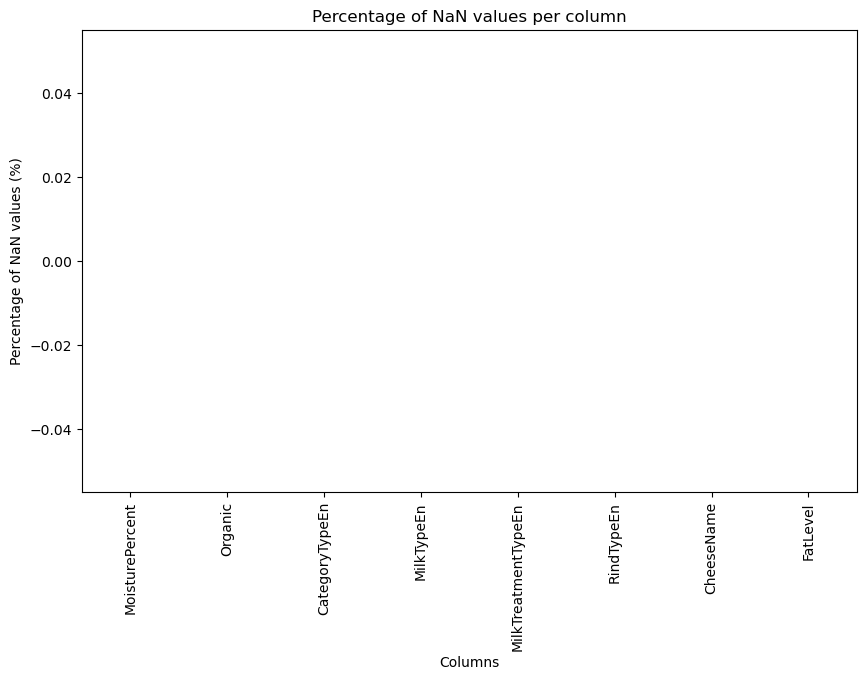

In [119]:
import matplotlib.pyplot as plt

nan_percentages = df.isnull().mean() * 100

plt.figure(figsize=(10, 6))
nan_percentages.plot(kind='bar')
plt.title('Percentage of NaN values per column')
plt.xlabel('Columns')
plt.ylabel('Percentage of NaN values (%)')
plt.show()

In [120]:
df["MilkTypeEn"].unique()

array(['Ewe', 'Cow', 'Goat', 'Cow and Goat', 'Ewe and Cow',
       'Ewe and Goat', 'Buffalo Cow', 'Cow, Goat and Ewe'], dtype=object)

In [121]:
label_encoder = LabelEncoder()
df["MilkTypeEn"] = label_encoder.fit_transform(df["MilkTypeEn"]) 

label_encoder = LabelEncoder()
df["MilkTreatmentTypeEn"] = label_encoder.fit_transform(df["MilkTreatmentTypeEn"]) 

df["CheeseName"].unique()

array(['Sieur de Duplessis (Le)', 'Tomme Le Champ Doré',
       'Provolone Sette Fette (Tre-Stelle)', 'Geai Bleu (Le)',
       'Gamin (Le)', 'Paneer (Northumberland Co-operative)',
       'Goat Brie (Woolwich)', 'Goat Cheddar (Woolwich)',
       'Goat Mozarella (Woolwich)', 'Goat Feta (Woolwich)',
       'Madame Chèvre Elite', 'Gouda (Jerseyland Organic)',
       'Cheddar (Jerseyland Organic)', 'Grana (Jerseyland Organic)',
       'Feta (Jerseyland Organic)',
       'Udderly Organic Goat Gouda (Jerseyland Organic)',
       'Udderly Organic Goat Feta (Jerseyland Organic)',
       'Cracked Pepper Verdelait', 'Cumin Verdelait',
       'Garlic and Chive Verdelait', 'Wasabi Verdelait',
       'Comox Camembert', 'Provolone (Silani)', 'Ricotta (Silani)',
       'Gouda (Sylvan Star Ltd.)', 'Niagara Gold', 'Cheddar (Balderson)',
       'Cheddars (Fromagerie St-Albert)', "Gouda (That Dutchman's Farm)",
       "Dragon's Breath", 'Feta (Black Diamond)',
       'Brebis frais (Best Baa Dairy)', 'Ewe

In [122]:
import re
# menghapus tanda kurung (text)
def rm_parenthesis(s: pd.Series):
    return re.sub(r'\(.*?\)', '', s).strip()

df["CheeseName"] = df["CheeseName"].apply(rm_parenthesis)
df["CheeseName"].unique

<bound method Series.unique of 0             Sieur de Duplessis
1            Tomme Le Champ Doré
2          Provolone Sette Fette
3                      Geai Bleu
4                          Gamin
                  ...           
1037                    Knoydart
1038                     FRESK-O
1039               Electric Blue
1040                     Hip Hop
1041    Super Fresh Cheese Curds
Name: CheeseName, Length: 977, dtype: object>

In [123]:
label_encoder = LabelEncoder()
df["CheeseName"] = label_encoder.fit_transform(df["CheeseName"])

df.dtypes

MoisturePercent        float64
Organic                  int64
CategoryTypeEn           int32
MilkTypeEn               int32
MilkTreatmentTypeEn      int32
RindTypeEn               int32
CheeseName               int32
FatLevel               float64
dtype: object

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 977 entries, 0 to 1041
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MoisturePercent      977 non-null    float64
 1   Organic              977 non-null    int64  
 2   CategoryTypeEn       977 non-null    int32  
 3   MilkTypeEn           977 non-null    int32  
 4   MilkTreatmentTypeEn  977 non-null    int32  
 5   RindTypeEn           977 non-null    int32  
 6   CheeseName           977 non-null    int32  
 7   FatLevel             977 non-null    float64
dtypes: float64(2), int32(5), int64(1)
memory usage: 49.6 KB


In [125]:
df.drop(columns=["CheeseName"], inplace=True)

In [126]:
# uji distribusi normal apakah perlu dilakukan  standarisasi
from scipy.stats import shapiro

stat, p = shapiro(df["MoisturePercent"])
print('Shapiro-Wilk Test: Statistics=%.3f, p=%.3f' % (stat, p))

Shapiro-Wilk Test: Statistics=0.952, p=0.000


p < 0.05 maka data tidak berdistribusi normal

In [129]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler(feature_range=(0.00, 0.99999))

df["MoisturePercent"] = minmax.fit_transform(df[["MoisturePercent"]])
df["MoisturePercent"].unique

<bound method Series.unique of 0       0.437496
1       0.448746
2       0.524995
3       0.437496
4       0.467495
          ...   
1037    0.312497
1038    0.424996
1039    0.349997
1040    0.274997
1041    0.243748
Name: MoisturePercent, Length: 977, dtype: float64>

In [130]:
os.chdir("D:/py/datamining/tugas-2")
df.to_csv('semi-processed.csv', index=False)